<a href="https://colab.research.google.com/github/GermanOmar/Composite1/blob/master/UTS_CompG0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensile strength prediction of composites


<a href="https://ibb.co/WkjFF6k"><img src="https://imgs.search.brave.com/ZNI3VzwIwHYdE09W08O_ZWL40cGnTdvKZhR0QCOhdug/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9jZG4u/YnJpdGFubmljYS5j/b20vNjAvMTg2MzYw/LTEzOC1CNTZGOUZC/OS9NZW1icmFuZXMt/Z3JhcGhlbmUtd2F0/ZXItV2F0ZXItbW9s/ZWN1bGVzLXNhbHQt/aW9ucy5qcGc_dz04/MDAmaD00NTAmYz1j/cm9w" WIDTH="500" HEIGHT="300"  border="0"></a>

## Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [5]:
#---------Scikit-learn Utilities---------------------------------------------------------------------------------------------
from sklearn.metrics import r2_score as R2
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

## Upload database:

In [7]:
#Experimental data
data = pd.read_table('/content/data2.txt')
data.describe()

,GO,UTS
count,36.000000,36.000000
mean,0.483333,63.939444
std,0.419864,7.852519
min,0.000000,40.740000
25%,0.100000,59.970000
50%,0.400000,63.850000
75%,0.800000,70.335000
max,1.200000,75.010000


In [8]:
df = data.copy()
df.head()

,GO,UTS
0,0.0,59.22
1,0.0,60.03
2,0.0,68.69
3,0.0,66.29
4,0.0,63.88


##Setting inputs - output:

In [9]:
X=data[['GO']]
Y=data['UTS'].values.reshape(-1, 1)


## Split data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 28  test samples: 8


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
!pip install lazypredict
warnings.filterwarnings("ignore")

In [13]:
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

In [14]:
from sklearn.metrics import mean_absolute_error as MAE
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 76%|███████▌  | 32/42 [00:01<00:00, 26.10it/s]

OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(28, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.


100%|██████████| 42/42 [00:03<00:00, 13.24it/s]

XGBRegressor model failed to execute
'super' object has no attribute '__sklearn_tags__'
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 28, number of used features: 0
[LightGBM] [Info] Start training from score 64.421428
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements


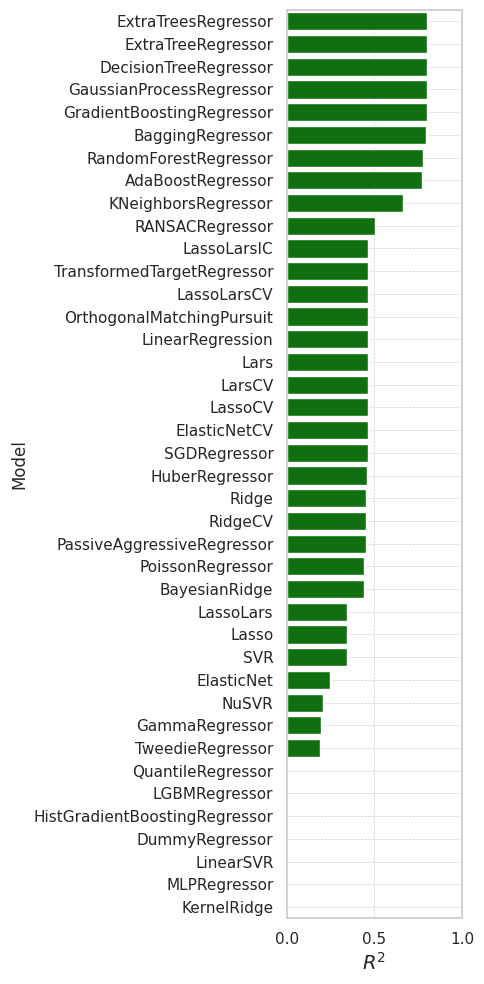

In [15]:
# Plotting
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

import seaborn as sns

plt.style.use('seaborn-v0_8-white')
#palette = sns.color_palette("crest", len(mi_df))

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'serif'
plt.style.use('seaborn-v0_8-white')
#palette = sns.color_palette("crest", len(mi_df))
sns.set_theme(style="whitegrid")

predictions["R-Squared"] = [0 if i < 0 else i for i in predictions.iloc[:,0] ]
plt.figure(figsize=(5, 10))
#palette = sns.color_palette("flare", len(corr_df))
ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions, color='green')
ax.set(xlim=(0, 1))
plt.xlabel('$R^2$', fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig('lazy1.png', dpi=300)

plt.show()

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
#KERNEL
#GBR=GradientBoostingRegressor(n_estimators=100, random_state=0)
ETR=ExtraTreesRegressor(n_estimators=1000, random_state=42 )

#START TRAINING
ETR.fit(X_train, y_train)
#PREDICTION
y_train_pred = ETR.predict(X_train)
y_test_pred = ETR.predict(X_test)

y_pred_train = ETR.predict(X_train)
y_pred_test = ETR.predict(X_test)

MSE_train = MSE(y_train, y_train_pred)
MSE_test = MSE(y_test, y_test_pred)
r2_train = R2(y_train, y_train_pred)
r2_test = R2(y_test, y_test_pred)
mae_train = MAE(y_train, y_train_pred)
mae_test = MAE(y_test, y_test_pred)

print('-'*100)
print(f'Error Metrics')
print(f'Training: MAE={mae_train:.4f}, MSE={MSE_train:.4f}, R2={r2_train:.4f}')
print(f'Testing: MAE={mae_test:.4f}, MSE={MSE_test:.4f}, R2={r2_test:.4f}')
print('-'*100)

----------------------------------------------------------------------------------------------------
Error Metrics
Training: MAE=2.8262, MSE=10.8314, R2=0.7460
Testing: MAE=2.7824, MSE=20.0942, R2=0.8280
----------------------------------------------------------------------------------------------------


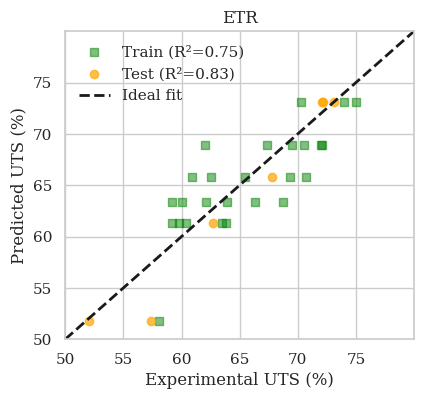

In [17]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

fig, axes = plt.subplots(1, 1, figsize=(4.5, 4), sharex=True, sharey=True)

ax = axes
ax.scatter(y_train, y_pred_train, label=f"Train (R²={r2_train:.2f})", alpha=0.5, color='green' , marker='s')
ax.scatter(y_test, y_pred_test, label=f"Test (R²={r2_test:.2f})", alpha=0.7, color='orange')
ax.plot([50, 80], [50, 80], 'k--', lw=2, label='Ideal fit')

ax.set_title("ETR")
ax.set_xlabel("Experimental UTS (%)")
ax.set_ylabel("Predicted UTS (%)")

ax.set_ylim(50, 80)
ax.set_xlim(50, 80)
ax.set_yticks(range(50, 80, 5))
ax.set_xticks(range(50, 80, 5))
ax.legend(loc='best')

#plt.savefig('ETR2.png', dpi=300)
plt.show()

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-2, 1e2)) * RBF(10, (1e-2, 1e2))

GP=GPR(kernel=kernel, n_restarts_optimizer=20, alpha=0.001, normalize_y=True)

#START TRAINING
GP.fit(X_train, y_train)
#PREDICTION
y_train_pred = GP.predict(X_train)
y_test_pred = GP.predict(X_test)

y_pred_train = GP.predict(X_train)
y_pred_test = GP.predict(X_test)

MSE_train = MSE(y_train, y_train_pred)
MSE_test = MSE(y_test, y_test_pred)
r2_train = R2(y_train, y_train_pred)
r2_test = R2(y_test, y_test_pred)
mae_train = MAE(y_train, y_train_pred)
mae_test = MAE(y_test, y_test_pred)

print('-'*100)
print(f'Error Metrics')
print(f'Training: MAE={mae_train:.4f}, MSE={MSE_train:.4f}, R2={r2_train:.4f}')
print(f'Testing: MAE={mae_test:.4f}, MSE={MSE_test:.4f}, R2={r2_test:.4f}')
print('-'*100)

----------------------------------------------------------------------------------------------------
Error Metrics
Training: MAE=2.8266, MSE=10.8314, R2=0.7460
Testing: MAE=2.7815, MSE=20.0957, R2=0.8280
----------------------------------------------------------------------------------------------------


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12
import seaborn as sns
import numpy as np
import pickle
from scipy import stats
import os
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.nonparametric.smoothers_lowess import lowess

In [20]:
def prediction_interval(y_pred, errors, confidence=0.95):
  std_error = np.std(errors)
  z_value = stats.norm.ppf((1 + confidence) / 2)
  lower_bound = y_pred - z_value * std_error
  upper_bound = y_pred + z_value * std_error
  return lower_bound, upper_bound

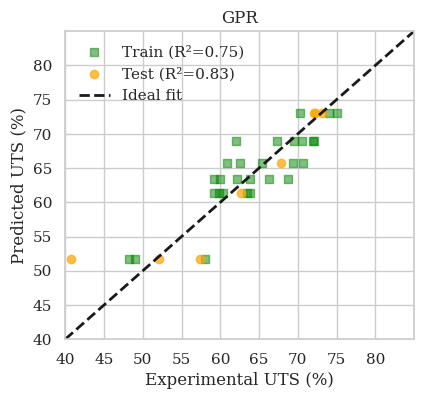

In [21]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

fig, axes = plt.subplots(1, 1, figsize=(4.5, 4), sharex=True, sharey=True)

ax = axes
ax.scatter(y_train, y_pred_train, label=f"Train (R²={r2_train:.2f})", alpha=0.5, color='green' , marker='s')
ax.scatter(y_test, y_pred_test, label=f"Test (R²={r2_test:.2f})", alpha=0.7, color='orange')
line = np.linspace(min(min(y_train), min(y_test)), max(max(y_train), max(y_test)), 100)
ax.plot([40, 85], [40, 85], 'k--', lw=2, label='Ideal fit')


ax.set_title("GPR")
ax.set_xlabel("Experimental UTS (%)")
ax.set_ylabel("Predicted UTS (%)")

ax.set_ylim(40, 85)
ax.set_xlim(40, 85)
ax.set_yticks(range(40, 85, 5))
ax.set_xticks(range(40, 85, 5))
ax.legend(loc='best')

#plt.savefig('GP.png', dpi=300)
plt.show()

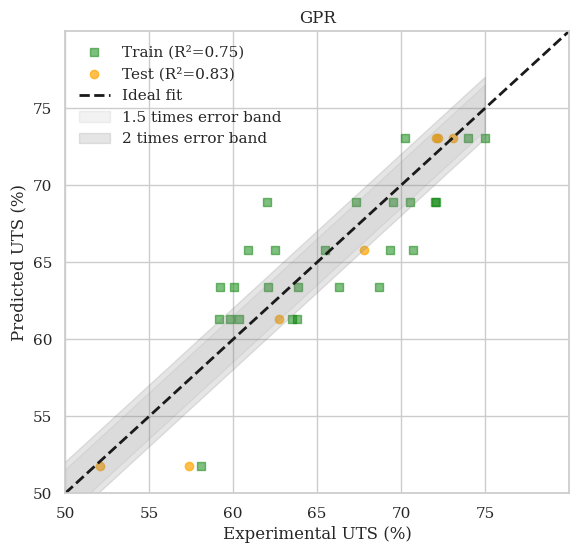

In [22]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

fig, axes = plt.subplots(1, 1, figsize=(6.5, 6), sharex=True, sharey=True)

ax = axes
ax.scatter(y_train, y_pred_train, label=f"Train (R²={r2_train:.2f})", alpha=0.5, color='green' , marker='s')
ax.scatter(y_test, y_pred_test, label=f"Test (R²={r2_test:.2f})", alpha=0.7, color='orange')

# Reshape y_train and y_test to 1D before calculating min and max
y_train_1d = y_train.ravel()  # Convert y_train to 1D
y_test_1d = y_test.ravel()  # Convert y_test to 1D

# Use the 1D arrays to create the line
line = np.linspace(min(y_train_1d.min(), y_test_1d.min()), max(y_train_1d.max(), y_test_1d.max()), 100)


ax.plot([50, 80], [50, 80], 'k--', lw=2, label='Ideal fit')
ax.fill_between(line, line - 1.5, line + 1.5, color='gray', alpha=0.1, label='1.5 times error band')
ax.fill_between(line, line - 2, line + 2, color='gray', alpha=0.2, label='2 times error band')
#ax.fill_between(line, line - 3, line + 3, color='gray', alpha=0.3, label='3 times error band')
#ax.legend(fontsize=11, frameon=True, loc='upper left', handlelength=2, handletextpad=0.5)

ax.set_title("GPR")
ax.set_xlabel("Experimental UTS (%)")
ax.set_ylabel("Predicted UTS (%)")

ax.set_ylim(50, 80)
ax.set_xlim(50, 80)
ax.set_yticks(range(50, 80, 5))
ax.set_xticks(range(50, 80, 5))
ax.legend(loc='best')

#plt.savefig('GP.png', dpi=300)
plt.show()

In [23]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score as CV

import warnings
warnings.filterwarnings('ignore')

models = [ ETR,  GP ]
labels = ['ETR', 'GP']
IMS = []

print("--------------------------------------------------------------")
print("%5s | %5s | %5s | %5s | %5s " % ("ML algorithm",  "CV-R2", "CV-MSE", "CV-MAE", "IM"))
print("--------------------------------------------------------------")

for mod, label in zip( models, labels):
  #y_star = mod.predict(X)

  scoreR2 = CV(mod, X_train, y_train, cv=5, scoring='r2')
  #print(-1*scoreR2)
  scoreMSE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  #print(-1*scoreMSE)
  scoreMAE = CV(mod, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
  #print(-1*scoreMAE)
  IM=np.sqrt(((1-scoreR2)**2) + (scoreMSE) + (scoreMAE**2) )
  #print("IM: ", IM)


  print("%15s | %.4f | %.4f | %.4f | %.4f " % (label,  scoreR2.mean(), -1*scoreMSE.mean(), -1*scoreMAE.mean() , np.sqrt(((1-scoreR2.mean())**2) + (-1*scoreMSE.mean()) + (scoreMAE.mean()**2) )))
print("--------------------------------------------------------------")

--------------------------------------------------------------
ML algorithm | CV-R2 | CV-MSE | CV-MAE |    IM 
--------------------------------------------------------------
            ETR | 0.3305 | 17.4908 | 3.5814 | 5.5467 
             GP | 0.3308 | 17.4798 | 3.5812 | 5.5455 
--------------------------------------------------------------


##Analytical model:

In [32]:
X=data[['GO']]
Y=data['UTS'].values.reshape(-1, 1)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4321)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 28  test samples: 8


In [34]:
def f(x):
  return -24.833 * x**2 + 16.543*x + 66.022

Xs = np.linspace(0.0,1.2,20)
Ys=f(Xs)

Text(0, 0.5, 'UTS (MPa)')

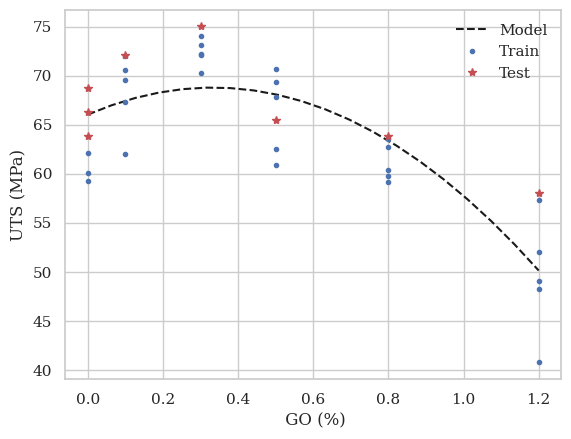

In [35]:

plt.plot(Xs, Ys, 'k--',  label = 'Model')
plt.plot(X_train, y_train, 'b.', label = 'Train')
plt.plot(X_test, y_test, 'r*', label = 'Test')
plt.legend()
plt.xlabel(' GO (%)')
plt.ylabel('UTS (MPa)')

##Gaussian Process

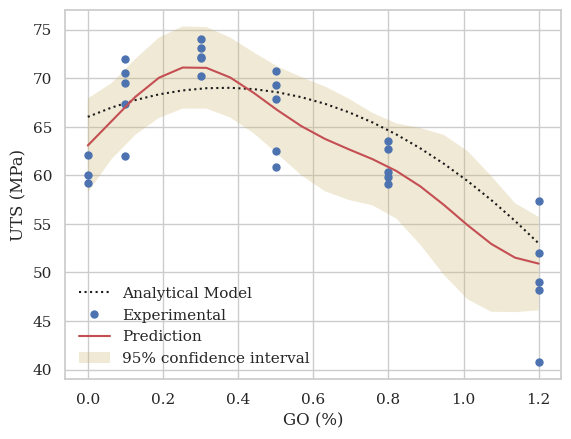

In [36]:
#Tunning hiperparameters (Training data)
def f(x):
  return -22.833 * x**2 + 16.543*x + 66.022

X1 = np.asarray(X_train)
y1 = np.asarray(y_train).ravel()

x1 = np.atleast_2d(np.linspace(0.0,1.2,20)).T

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-3, 1e3))
model = GPR(kernel=kernel, n_restarts_optimizer=8, alpha=0.5, normalize_y=True)

model.fit(X1, y1)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = model.predict(x1, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on the MSE
plt.figure()
plt.plot(x1, f(x1), 'k:', label=r'Analytical Model')
plt.plot(X1, y1, 'b.', markersize=10, label='Experimental')
plt.plot(x1, y_pred, 'r-', label='Prediction')
plt.fill(np.concatenate([x1, x1[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.3, fc='y', ec='None', label='95% confidence interval')
plt.xlabel('GO (%)')
plt.ylabel('UTS (MPa)')
plt.legend(loc='best')

plt.savefig('train.png', dpi=300)

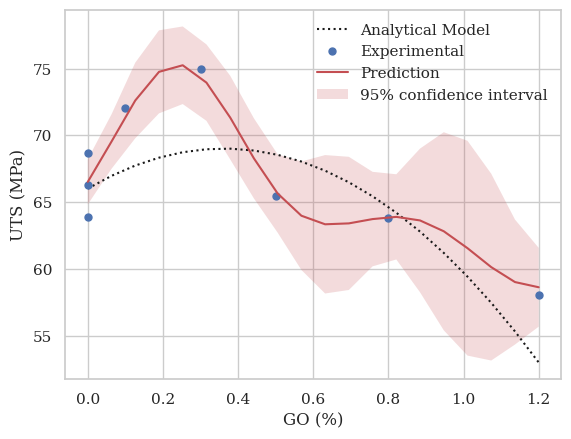

In [37]:
#Tunning hiperparameters (Testing data)
def f(x):
  return -22.833 * x**2 + 16.543*x + 66.022

X2 = np.asarray(X_test)
y2 = np.asarray(y_test).ravel()

x2 = np.atleast_2d(np.linspace(0.0,1.2,20)).T

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-3, 1e3))
model = GPR(kernel=kernel, n_restarts_optimizer=8, alpha=0.1, normalize_y=True)

model.fit(X2, y2)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = model.predict(x2, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on the MSE
plt.figure()
plt.plot(x2, f(x2), 'k:', label=r'Analytical Model')
plt.plot(X2, y2, 'b.', markersize=10, label='Experimental')
plt.plot(x2, y_pred, 'r-', label='Prediction')
plt.fill(np.concatenate([x2, x2[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.2, fc='r', ec='None', label='95% confidence interval')
plt.xlabel('GO (%)')
plt.ylabel('UTS (MPa)')
plt.legend(loc='best')

plt.savefig('test.png', dpi=300)

#Conclusions: